In [1]:
import os
import numpy as np
import cv2
import gc 

In [2]:
# load the preprocess data
data = np.load('./data/data_preprocess.npz')

In [3]:
X = data['arr_0']
y = data['arr_1']

In [4]:
X.shape, y.shape

((5620, 100, 100, 3), (5620,))

In [5]:
np.unique(y)

array(['with_mask', 'without_mask'], dtype='<U12')

In [6]:
y

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [7]:
#one hot encoding format
from sklearn.preprocessing import OneHotEncoder

In [8]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [9]:
y_array = y_onehot.toarray()

In [10]:
y_array.shape

(5620, 2)

In [11]:
###Split the data into Train and Test sets

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y_array,test_size=0.2, random_state = 42) #%20 test, %80 train

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape 
# training data, testing data, label for training, label for testing

((4496, 100, 100, 3), (1124, 100, 100, 3), (4496, 2), (1124, 2))

In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [15]:
# convolutional neural network

model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation = 'relu'), #number of filters, kernel size, info about padding, same padding = 0 padding
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, padding = 'same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(), 
    layers.Dense(135, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(2, activation = 'sigmoid')
])

#compiling CNN model
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                                                   loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0

In [17]:
#training CNN model
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=5,epochs=10)

Epoch 1/10
900/900 [==============================] - 44s 48ms/step - loss: 0.1989 - accuracy: 0.9317 - val_loss: 0.2055 - val_accuracy: 0.9279
Epoch 2/10
900/900 [==============================] - 41s 46ms/step - loss: 0.0911 - accuracy: 0.9655 - val_loss: 0.1072 - val_accuracy: 0.9626
Epoch 3/10
900/900 [==============================] - 42s 47ms/step - loss: 0.0786 - accuracy: 0.9713 - val_loss: 0.0854 - val_accuracy: 0.9769
Epoch 4/10
900/900 [==============================] - 45s 50ms/step - loss: 0.0545 - accuracy: 0.9786 - val_loss: 0.0953 - val_accuracy: 0.9760
Epoch 5/10
900/900 [==============================] - 52s 57ms/step - loss: 0.0509 - accuracy: 0.9840 - val_loss: 0.0772 - val_accuracy: 0.9778
Epoch 6/10
900/900 [==============================] - 37s 41ms/step - loss: 0.0224 - accuracy: 0.9920 - val_loss: 0.5169 - val_accuracy: 0.9466
Epoch 7/10
900/900 [==============================] - 38s 43ms/step - loss: 0.0355 - accuracy: 0.9873 - val_loss: 0.1214 - val_accuracy:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
history_df = pd.DataFrame(history.history)

In [20]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.198868,0.931717,0.205483,0.927936
1,0.091085,0.965525,0.107211,0.962633
2,0.078585,0.971308,0.085359,0.976868
3,0.054527,0.978648,0.095315,0.975979
4,0.050882,0.983986,0.077223,0.977758
5,0.022409,0.991993,0.516871,0.946619
6,0.035510,0.987322,0.121387,0.980427
7,0.014488,0.995107,0.175292,0.970641
8,0.016959,0.996219,0.125884,0.982206
9,0.013818,0.993327,0.133193,0.972420


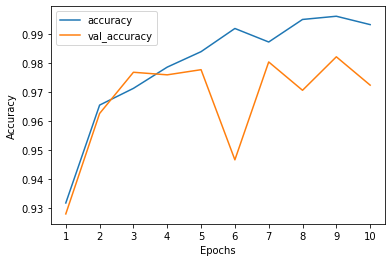

In [21]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

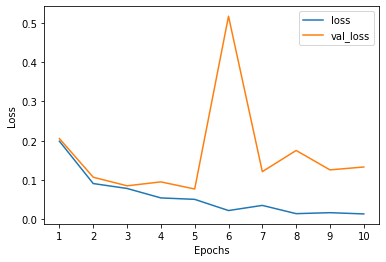

In [22]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [23]:
#blue is train accuracy, orange is test accuracy

In [24]:
#Save CNN model
model.save('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model\assets


In [25]:
onehot.categories_

[array(['with_mask', 'without_mask'], dtype='<U12')]